In [7]:
# Importação das bibliotecas
import pandas as pd # => análise exploratória e tratamento dos dados
import seaborn as srn # => visualização de dados
import statistics as sts # => cálculos estatísticos
import numpy as np # => cálculos em Array (estrutura de dados)
import matplotlib.pyplot as plt # => visualização de dados
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
#conda install -c conda-forge python-graphviz (para evitar warnings)

In [369]:
# Carregamento da base de dados
titanic = pd.read_csv('C:\\Users\\jjollo\\Desktop\\ST\\Renato\\Pós em Ciência de Dados\\train.csv', sep=",")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [370]:
#retirar variáveis não relevantes
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [371]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [372]:
#check missings
#titanic[titanic['Age'].isna()]

#verificar campos nulos
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [373]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [374]:
#remover nas e substiutir pela mediana
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic['Embarked'].fillna('S', inplace=True)

In [375]:
#remover nas e substiutir pela mediana
mediana = sts.median(titanic['Age'])
mediana

28.0

In [376]:
#verificar campos nulos
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [377]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [378]:
titanic['Age'] = titanic['Age'].astype('int64')
titanic['Fare'] = titanic['Fare'].astype('int64')
#titanic['Sex'] = titanic['Sex'].astype('string')
#titanic['Embarked'] = titanic['Embarked'].astype('string')

#conversão em inteiro criando um novo campo
#titanic["tarifa"]= titanic["Fare"].astype(int)
#titanic.head(10)

In [379]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Fare      891 non-null    int64 
 7   Embarked  891 non-null    object
dtypes: int64(6), object(2)
memory usage: 55.8+ KB


In [380]:
# substituir valores categóricos por numéricos
titanic['Sex'] = titanic['Sex'].replace(['male','female'],[0,1])
titanic['Embarked'] = titanic['Embarked'].replace(['C','Q','S'],[0,1,2])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,2
1,1,1,1,38,1,0,71,0
2,1,3,1,26,0,0,7,2
3,1,1,1,35,1,0,53,2
4,0,3,0,35,0,0,8,2


In [381]:
# pd.get_dummies Converta variáveis categóricas em variáveis 0,1.
#titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])
#titanic.head()

#titanic = pd.get_dummies(titanic['Sex'])

In [382]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


Text(0.5, 0, 'Idade')

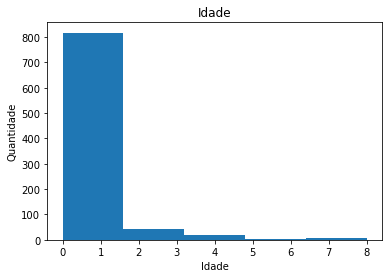

In [383]:
# Visualização do histograma com 5 divisões (bins)
plt.hist(titanic.iloc[:,4], bins = 5)
plt.title('Idade')
plt.ylabel('Quantidade')
plt.xlabel('Idade')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

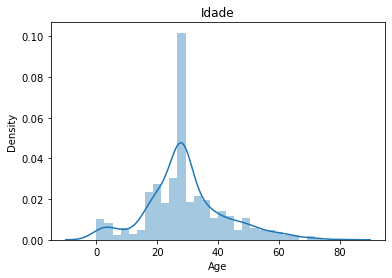

In [384]:
#histograma
srn.distplot(titanic['Age']).set_title('Idade')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

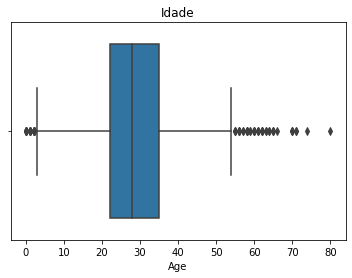

In [385]:
#boxplot
srn.boxplot(titanic['Age']).set_title('Idade')

Text(0.5, 0, 'irmãos/cônjuges')

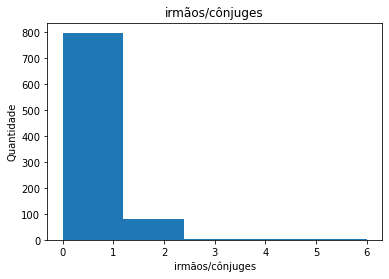

In [386]:
# Visualização do histograma com 5 divisões (bins)
plt.hist(titanic.iloc[:,5], bins = 5)
plt.title('irmãos/cônjuges')
plt.ylabel('Quantidade')
plt.xlabel('irmãos/cônjuges')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'irmãos/cônjuges')

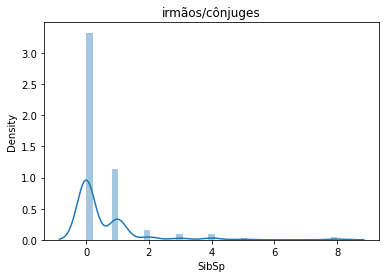

In [387]:
#histograma
srn.distplot(titanic['SibSp']).set_title('irmãos/cônjuges')

Text(0.5, 0, 'pais/filhos')

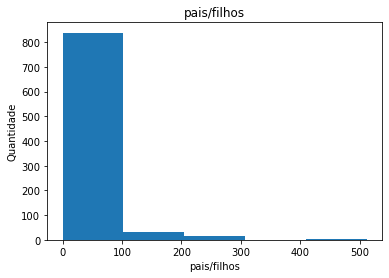

In [388]:
# Visualização do histograma com 5 divisões (bins)
plt.hist(titanic.iloc[:,6], bins = 5)
plt.title('pais/filhos')
plt.ylabel('Quantidade')
plt.xlabel('pais/filhos')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'pais/filhos')

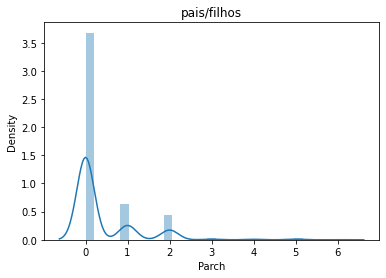

In [389]:
#histograma
srn.distplot(titanic['Parch']).set_title('pais/filhos')

Text(0.5, 0, 'tarifa')

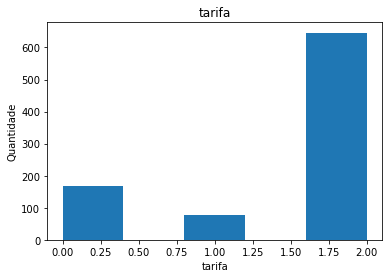

In [390]:
# Visualização do histograma com 5 divisões (bins)
plt.hist(titanic.iloc[:,7], bins = 5)
plt.title('tarifa')
plt.ylabel('Quantidade')
plt.xlabel('tarifa')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'tarifa')

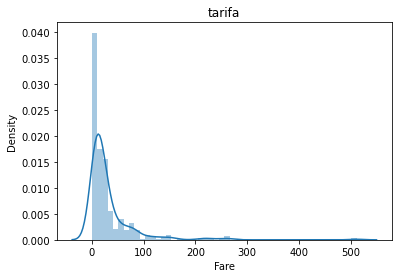

In [391]:
#histograma
srn.distplot(titanic['Fare']).set_title('tarifa')

C:\Users\jjollo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'tarifa')

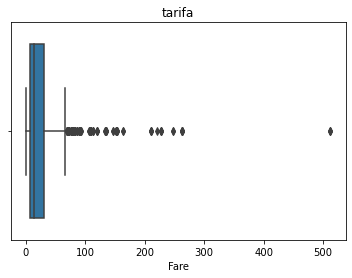

In [392]:
#boxplot
srn.boxplot(titanic['Fare']).set_title('tarifa')

In [393]:
#verificar dados duplicados
#titanic[titanic.duplicated(['Name'],keep=False)]

In [395]:
#criar grupos de idade
agrupado_idade = titanic.groupby(['Age'], as_index=False)['Survived'].count()
agrupado_idade

,Age,Survived
0,0,7
1,1,7
2,2,10
3,3,6
4,4,10
...,...,...
66,66,1
67,70,3
68,71,2
69,74,1


<AxesSubplot:xlabel='Faixa_Idade'>

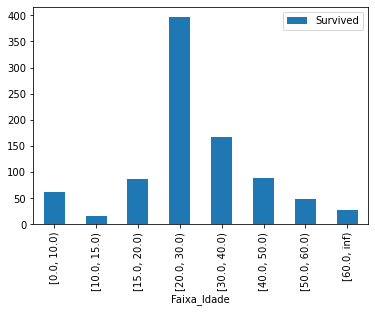

In [397]:
titanic['Faixa_Idade']=pd.cut(titanic.Age, bins=[0.0,10.0,15.0,20.0,30.0,40.0,50.0,60.0,np.inf], right=False)
titanic.groupby(['Faixa_Idade'], as_index=False)['Survived'].count().set_index('Faixa_Idade').plot(kind='bar')

In [398]:
titanic['Faixa_Idade']=pd.cut(titanic.Age, bins=[0.0,10.0,15.0,20.0,30.0,40.0,50.0,60,np.inf], right=False)
titanic.groupby(['Faixa_Idade'], as_index=False)['Survived'].count().set_index('Faixa_Idade')

,Survived
Faixa_Idade,
"[0.0, 10.0)",62
"[10.0, 15.0)",16
"[15.0, 20.0)",86
"[20.0, 30.0)",397
"[30.0, 40.0)",167
"[40.0, 50.0)",89
"[50.0, 60.0)",48
"[60.0, inf)",26


In [399]:
#0 = No, 1 = Yes
agrupado = titanic.groupby(['Survived','Sex','Faixa_Idade']).size()
agrupado

#Survived, Sex, Pclass, Age, Embarked, Faixa_Idade

Survived  Sex  Faixa_Idade 
0         0    [0.0, 10.0)      13
               [10.0, 15.0)      5
               [15.0, 20.0)     45
               [20.0, 30.0)    231
               [30.0, 40.0)     84
               [40.0, 50.0)     45
               [50.0, 60.0)     26
               [60.0, inf)      19
          1    [0.0, 10.0)      11
               [10.0, 15.0)      4
               [15.0, 20.0)      7
               [20.0, 30.0)     37
               [30.0, 40.0)     10
               [40.0, 50.0)     10
               [50.0, 60.0)      2
               [60.0, inf)       0
1         0    [0.0, 10.0)      19
               [10.0, 15.0)      2
               [15.0, 20.0)      5
               [20.0, 30.0)     41
               [30.0, 40.0)     23
               [40.0, 50.0)     12
               [50.0, 60.0)      4
               [60.0, inf)       3
          1    [0.0, 10.0)      19
               [10.0, 15.0)      5
               [15.0, 20.0)     29
               [20.0, 30.0)

<AxesSubplot:xlabel='Survived,Sex,Faixa_Idade'>

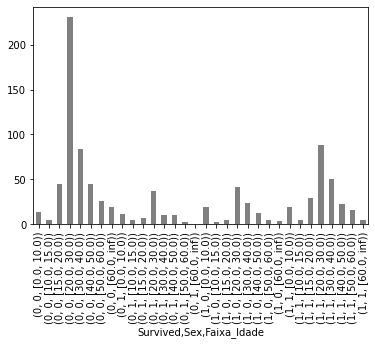

In [400]:
agrupado.plot.bar(color = 'gray')

In [402]:
# Separando X e Y

#previsores = titanic.drop('Survived', axis=1)
#classe = titanic[['Survived']].copy()

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    int64   
 3   Age          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    int64   
 7   Embarked     891 non-null    int64   
 8   Faixa_Idade  891 non-null    category
dtypes: category(1), int64(8)
memory usage: 57.4 KB


In [403]:
# Modelo de árvore de decisão

previsores = titanic.iloc[:,1:8].values
classe = titanic.iloc[:,0].values

In [404]:
# Conversão dos atributos categóricos para atributos numéricos, passando o índice de cada atributo categórico
#labelencoder = LabelEncoder()
#previsores.iloc[:,2] = labelencoder.fit_transform(previsores.iloc[:,2])
#previsores.iloc[:,6] = labelencoder.fit_transform(previsores.iloc[:,6])
#previsores.iloc[:,8] = labelencoder.fit_transform(previsores.iloc[:,8])

#previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
#previsores[:,7] = labelencoder.fit_transform(previsores[:,7])

In [405]:
# Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
# Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [406]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [412]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')

#colar no webgraphviz.com

In [408]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [409]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[144,  24],
       [ 32,  68]], dtype=int64)

In [410]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7910447761194029

In [411]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.20895522388059706